# Lab #2: Probability, Distributions, and Statistical Questions

## Problem 1

In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).


A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

Assume in 1 day the average cosmic-ray background is 5 and the average number of gamma-rays emitted by our hypothetical source is 9.
The background of the cosmics rays follows the Poisson distribution as shows in plot below:

Text(0, 0.5, 'Probability')

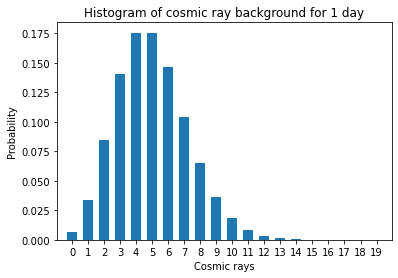

In [226]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats, signal
cosmic = 5
gamma = 9

dist = stats.poisson(cosmic)
x = np.arange(0, 20)
prob = dist.pmf(x)
plt.vlines(x, 0, prob, linewidth=10, color="C0")
plt.xticks(x)
plt.ylim(0, None)
plt.title("Histogram of cosmic ray background for 1 day")
plt.xlabel("Cosmic rays")
plt.ylabel("Probability")


After 3 days, the sum of cosmic rays looks more symmetric. As days increase, the distribution spreads out more and the right tail become shorter. 

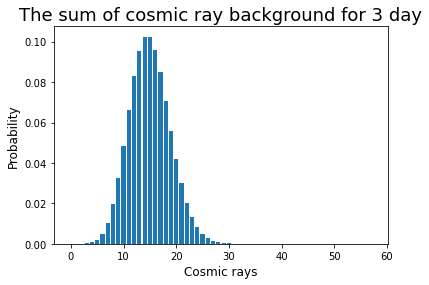

In [227]:
n=3
sums=prob
for i in range(n-1):
    sums=scipy.signal.fftconvolve(sums,prob);
xmin=x[0]*n;
xmax=x[len(x)-1]*n
x1=np.arange(xmin,xmax+1)
ax=plt.bar(x1,sums)
plt.xlabel('Cosmic rays', size=12)
plt.ylabel('Probability', size=12)
plt.title('The sum of cosmic ray background for 3 day', size=18)
plt.show()

B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

After 5 days, the summed probability distribution looks more symmetric. However, we can see it is still a Poisson distribution by looking at the plot in log scale. The logscale plot still has the "tail" on the right side. This makes sense because when we summed multiple Poisson distribution, it will just changes the mean of the Poisson distribution. 

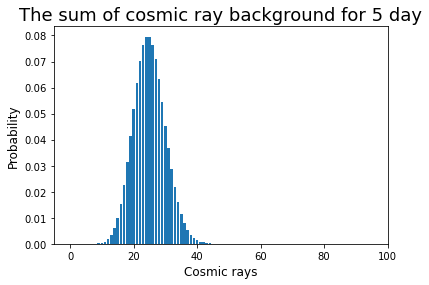

In [228]:
n=5
sums=prob
for i in range(n-1):
    sums=scipy.signal.fftconvolve(sums,prob);
xmin=x[0]*n;
xmax=x[len(x)-1]*n
x2=np.arange(xmin,xmax+1)
ax=plt.bar(x2,sums)
plt.xlabel('Cosmic rays', size=12)
plt.ylabel('Probability', size=12)
plt.title('The sum of cosmic ray background for 5 day', size=18)
plt.show()

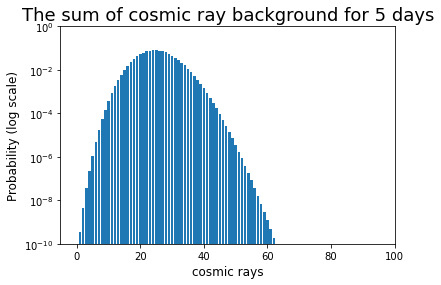

In [229]:
ax=plt.bar(x2,sums)
plt.xlabel('cosmic rays', size=12)
plt.ylabel('Probability (log scale)', size=12)
plt.title('The sum of cosmic ray background for 5 days',size=18)
plt.yscale('log')
plt.ylim(1e-10,1)
plt.show()

C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

(1e-10, 1)

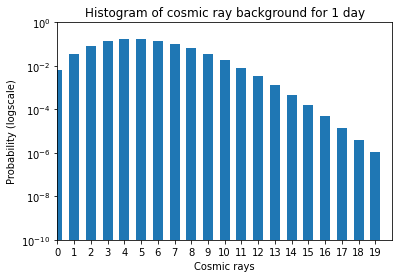

In [230]:
plt.vlines(x, 0, prob, linewidth=10, color="C0")
plt.xticks(x)
plt.title("Histogram of cosmic ray background for 1 day")
plt.xlabel("Cosmic rays")
plt.ylabel("Probability (logscale)")
plt.yscale('log')
plt.xlim(0,20)
plt.ylim(1e-10,1)

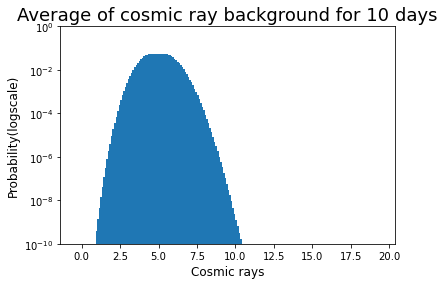

In [231]:
n=10
sums=prob
for i in range(n-1):
    sums=scipy.signal.fftconvolve(sums,prob);
xmin=x[0]*n;
xmax=x[len(x)-1]*n
x2=np.arange(xmin,xmax+1)
ax=plt.bar(x2/n,sums)
plt.xlabel('Cosmic rays', size=12)
plt.ylabel('Probability(logscale)', size=12)
plt.title('Average of cosmic ray background for 10 days', size=18)
plt.yscale('log')
plt.ylim(1e-10,1)
plt.show()

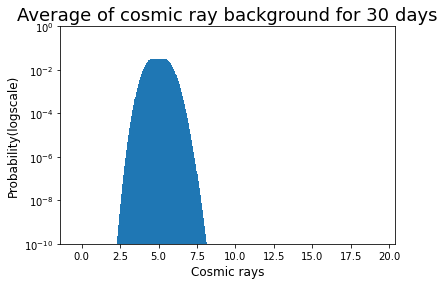

In [232]:
n=30
sums=prob
for i in range(n-1):
    sums=scipy.signal.fftconvolve(sums,prob);
xmin=x[0]*n;
xmax=x[len(x)-1]*n
x2=np.arange(xmin,xmax+1)
ax=plt.bar(x2/n,sums)
plt.xlabel('Cosmic rays', size=12)
plt.ylabel('Probability(logscale)', size=12)
plt.title('Average of cosmic ray background for 30 days', size=18)
plt.yscale('log')
plt.ylim(1e-10,1)
plt.show()

As the number of days becomes larger, the x-axis becomes narrower and the distribution becomes more Gaussian. In the log scale, the 'tail' getting shorter and eventually, the distribution becomes a downward parabola. This matched with the central limit theorem. When we summed the distribution, convolve it repeatedly it will converge to a Gaussian distribution.

D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

Lets choose 10 days, assume that we observed 90 gamma rays. The probability that the cosmic ray background look like 90 or more gamma rays is:

In [233]:
#the mean of the summed distribution is 10*5=50
probability=stats.poisson(50).sf(90)
sigma=stats.norm.ppf(1-probability)
print("the sigma of our observation is",sigma)

the sigma of our observation is 5.158525818551954


## Problem 2

Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

A) Show how the distribution changes as you average over more observing intervals.


(0.0, 10.0)

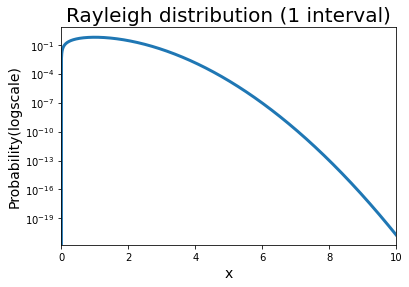

In [234]:
dist = stats.rayleigh(scale=1)
x = np.linspace(0, 10, 10000)
y=dist.pdf(x)
plt.title("Rayleigh distribution (1 interval)",size=20)
plt.xlabel("x", size=14)
plt.ylabel("Probability(logscale)", size=14)
plt.plot(x, y, linewidth=3)
plt.yscale('log')
plt.xlim(0, 10)

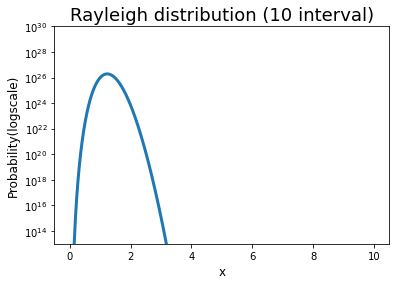

In [235]:
n=10
sums=y
for i in range(n-1):
    sums=scipy.signal.fftconvolve(sums,y);
x=np.linspace(0,10,len(sums))
plt.plot(x,sums,linewidth=3)
plt.xlabel('x', size=12)
plt.ylabel('Probability(logscale)', size=12)
plt.yscale('log')
plt.ylim(1e+13,1e+30)
plt.title('Rayleigh distribution (10 interval)', size=18)
plt.show()

(0.0, 10.0)

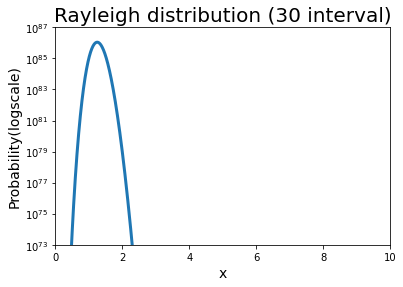

In [236]:
n=30
sums=y
for i in range(n-1):
    sums=scipy.signal.fftconvolve(sums,y);
x1=np.linspace(0,10,len(sums))
plt.plot(x1,sums,linewidth=3)
plt.title("Rayleigh distribution (30 interval)",size=20)
plt.xlabel("x", size=14)
plt.ylabel("Probability(logscale)", size=14)
plt.yscale('log')
plt.ylim(1e+73,1e+87)
plt.xlim(0, 10)

(0.0, 10.0)

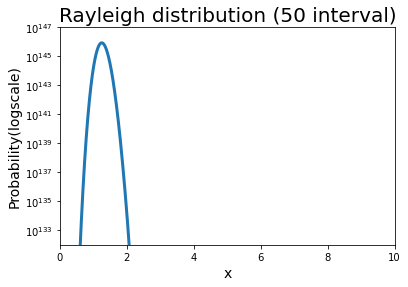

In [237]:
n=50
sums=y
for i in range(n-1):
    sums=scipy.signal.fftconvolve(sums,y);
x1=np.linspace(0,10,len(sums))
plt.plot(x1,sums,linewidth=3)
plt.title("Rayleigh distribution (50 interval)",size=20)
plt.xlabel("x", size=14)
plt.ylabel("Probability(logscale)", size=14)
plt.yscale('log')
plt.ylim(1e+132,1e+147)
plt.xlim(0, 10)

(0.0, 10.0)

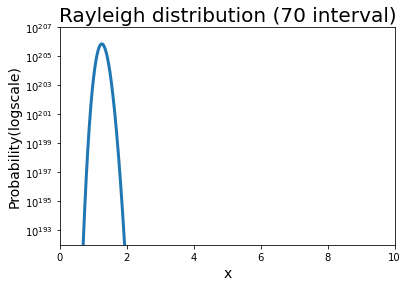

In [238]:
n=70
sums=y
for i in range(n-1):
    sums=scipy.signal.fftconvolve(sums,y);
x1=np.linspace(0,10,len(sums))
plt.plot(x1,sums,linewidth=3)
plt.title("Rayleigh distribution (70 interval)",size=20)
plt.xlabel("x", size=14)
plt.ylabel("Probability(logscale)", size=14)
plt.yscale('log')
plt.ylim(1e+192,1e+207)
plt.xlim(0, 10)

B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

The distribution get narrower and taller. At first the distribution still have the 'tail' but as the interval increase, the shape appoarch a Gaussian distribution. After 70 interval, the shape start to look parabolic on a log scale.

## Problem 3

The discovery of optical/infra-red counterparts of Neutron star mergers initially detected with gravity-waves is one of the great discoverys in the last few years (wikipedia, scientific paper), and has ushered in the age of "multi-messenger astrophysics." The science that can be done by matching a gravity-wave signal (directly measures the mass of the neutron stars and their distance) with the optical emisson (redshift, nuclear astrophysics of the resulting explosion) is staggering. Lots of science from how the heaviest elements are formed to constraints on Dark Energy.

We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image.

### Version 1

You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.

A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

Lets choose the width of the background Gaussian distribution is 10. Assuming we see a signal of strength 6.
Here's the graph of the background for 1 pixel

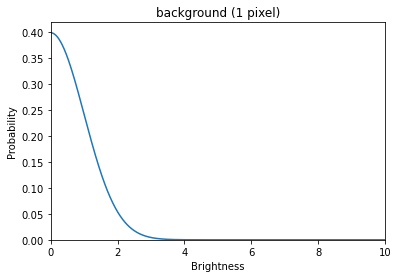

In [239]:
dist = stats.norm(scale=1)
x = np.linspace(0, 10, 1000)
plt.title("background (1 pixel)")
plt.xlabel("Brightness")
plt.ylabel("Probability")
plt.plot(x, dist.pdf(x))
plt.xlim(0, 10)
plt.ylim(0,None);

The significance of our the detection can be calculated by integrate the background distribution from 6 to infinity, then convert it to sigma:

In [240]:
prob=dist.sf(6)
sigma=stats.norm.ppf(1-prob)
print('the significance of our detection is', sigma)

the significance of our detection is 5.9999999908841595


5.999 sigma is greater than 5 sigma so we can claim a discovery.

### Version 2

You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

Now, we look at 10k pixel. Here's the background distribution for 10k pixel

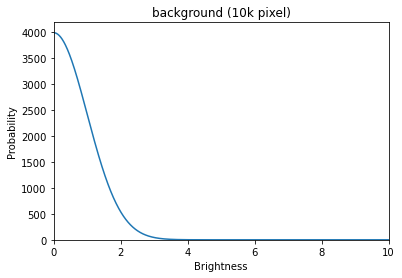

In [241]:
dist = stats.norm(scale=1)
x = np.linspace(0, 10, 1000)
plt.title("background (10k pixel)")
plt.xlabel("Brightness")
plt.ylabel("Probability")
plt.plot(x, dist.pdf(x)*10000)
plt.xlim(0, 10)
plt.ylim(0,None);

In [242]:
prob1=10000*dist.sf(6)
print('the probability that we find the signal strength of 6 with a background of 10k pixel is',prob1)

the probability that we find the signal strength of 6 with a background of 10k pixel is 9.865876450376946e-06


C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [243]:
sigma=stats.norm.ppf(1-prob1)
print('the significance of our detection is', sigma)

the significance of our detection is 4.267904763040277


With 10k pixel, now the significance is less than 5 sigma so we are no longer can claim discovery. 

## Problem 4 

The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.

Let us again assume we have a Gaussian background (same parameters as Problem 3).

A) Calculate the signal required for a 5-sigma detection in Version 1

In [244]:
p1= stats.norm.sf(5)
sig1= dist.ppf(1-p1)
print('the signal required for a 5 sigma detection in 1 pixel is',sig1)

the signal required for a 5 sigma detection in 1 pixel is 4.999999999970176


B) Calculate the signal required for a 5-sigma detection in Version 2

In [245]:
p2=stats.norm.sf(5)/10000
sig2= dist.ppf(1-p2)
print('the signal required for a 5 sigma detection in 10k pixel is',sig2)

the signal required for a 5 sigma detection in 10k pixel is 6.550537486891655


C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

In [246]:
print(sig2/sig1)

1.3101074973861455


The signal must be 1.3 times brighter for discovery if we have 10k trials. Look at the probability distribution in problem 3 versions 1 and version 2, we can see that the distribution gets taller but the x-axis stays the same. The probability decrease more quickly, so that makes the sensitivity penalty due to the trials factor is low.

D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

If we have 10,000,000 trials, we have:

In [247]:
p3=stats.norm.sf(5)/10000000
sig3= dist.ppf(1-p3)
print('the signal required for a 5 sigma detection in 10k pixel is',sig3)

the signal required for a 5 sigma detection in 10k pixel is 7.514137139420544


In [248]:
print(sig3/sig1)

1.5028274278930729


As we increase the trials factor to 10,000,000, the signal required for 5 sigmas only increases from 4.99 to 7.5. As the trials increase, the signal threshold also increases but not as much.